In [2]:
import tushare as ts
import pandas as pd
import statsmodels.api as sm
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
pro = ts.pro_api()

In [3]:
CODE = "10001025.SH"
CODE = "10000844.SH" #2017

option_price = pro.opt_daily(ts_code=CODE,fields= 'trade_date, close')

# clean
option_price.index = option_price.trade_date
option_price = option_price.drop(columns='trade_date')
option_price.index = pd.to_datetime(option_price.index)
option_price = option_price.sort_index()
option_price

,close
trade_date,
2017-01-26,0.1433
2017-02-03,0.1345
2017-02-06,0.1309
2017-02-07,0.1236
2017-02-08,0.1280
2017-02-09,0.1368
2017-02-10,0.1421
2017-02-13,0.1427
2017-02-14,0.1353


In [4]:
sub = option_price.close

In [5]:
sub = option_price.close
train = sub.loc[:'2018-02']
test = sub.loc['2018-03':]
sub

trade_date
2017-01-26    0.1433
2017-02-03    0.1345
2017-02-06    0.1309
2017-02-07    0.1236
2017-02-08    0.1280
2017-02-09    0.1368
2017-02-10    0.1421
2017-02-13    0.1427
2017-02-14    0.1353
2017-02-15    0.1367
2017-02-16    0.1394
2017-02-17    0.1357
2017-02-20    0.1541
2017-02-21    0.1575
2017-02-22    0.1595
2017-02-23    0.1540
2017-02-24    0.1524
2017-02-27    0.1379
2017-02-28    0.1401
2017-03-01    0.1393
2017-03-02    0.1332
2017-03-03    0.1293
2017-03-06    0.1302
2017-03-07    0.1294
2017-03-08    0.1258
2017-03-09    0.1142
2017-03-10    0.1085
2017-03-13    0.1165
2017-03-14    0.1155
2017-03-15    0.1153
               ...  
2017-08-17    0.3591
2017-08-18    0.3721
2017-08-21    0.3708
2017-08-22    0.3900
2017-08-23    0.4135
2017-08-24    0.4007
2017-08-25    0.4648
2017-08-28    0.4931
2017-08-29    0.4976
2017-08-30    0.4833
2017-08-31    0.4784
2017-09-01    0.4719
2017-09-04    0.4724
2017-09-05    0.4863
2017-09-06    0.4717
2017-09-07    0.4468
20

## Draw diff

In [6]:
option_price['close_diff_1'] = option_price['close'].diff(1)
option_price['close_diff_2'] = option_price['close'].diff(2)

option_price = option_price.dropna()
option_price

,close,close_diff_1,close_diff_2
trade_date,,,
2017-02-06,0.1309,-0.0036,-0.0124
2017-02-07,0.1236,-0.0073,-0.0109
2017-02-08,0.1280,0.0044,-0.0029
2017-02-09,0.1368,0.0088,0.0132
2017-02-10,0.1421,0.0053,0.0141
2017-02-13,0.1427,0.0006,0.0059
2017-02-14,0.1353,-0.0074,-0.0068
2017-02-15,0.1367,0.0014,-0.0060
2017-02-16,0.1394,0.0027,0.0041


Text(0.5,1,'201709_Call_2.30')

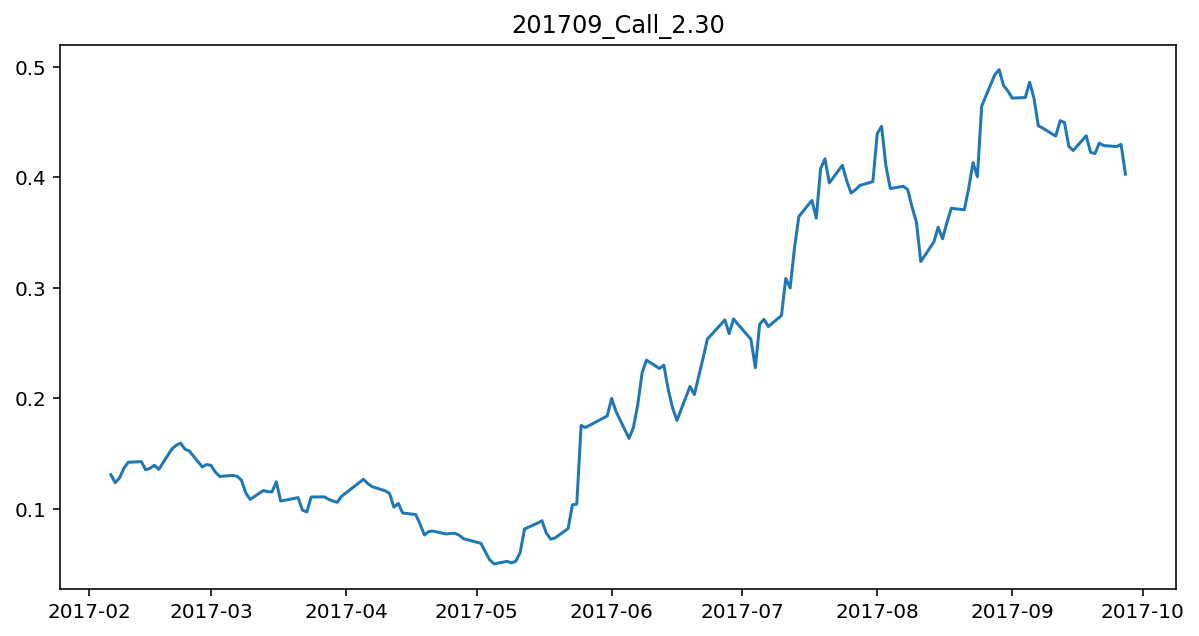

In [7]:
plt.figure(figsize=(10,5))
plt.plot(option_price['close'])
plt.title("201709_Call_2.30")

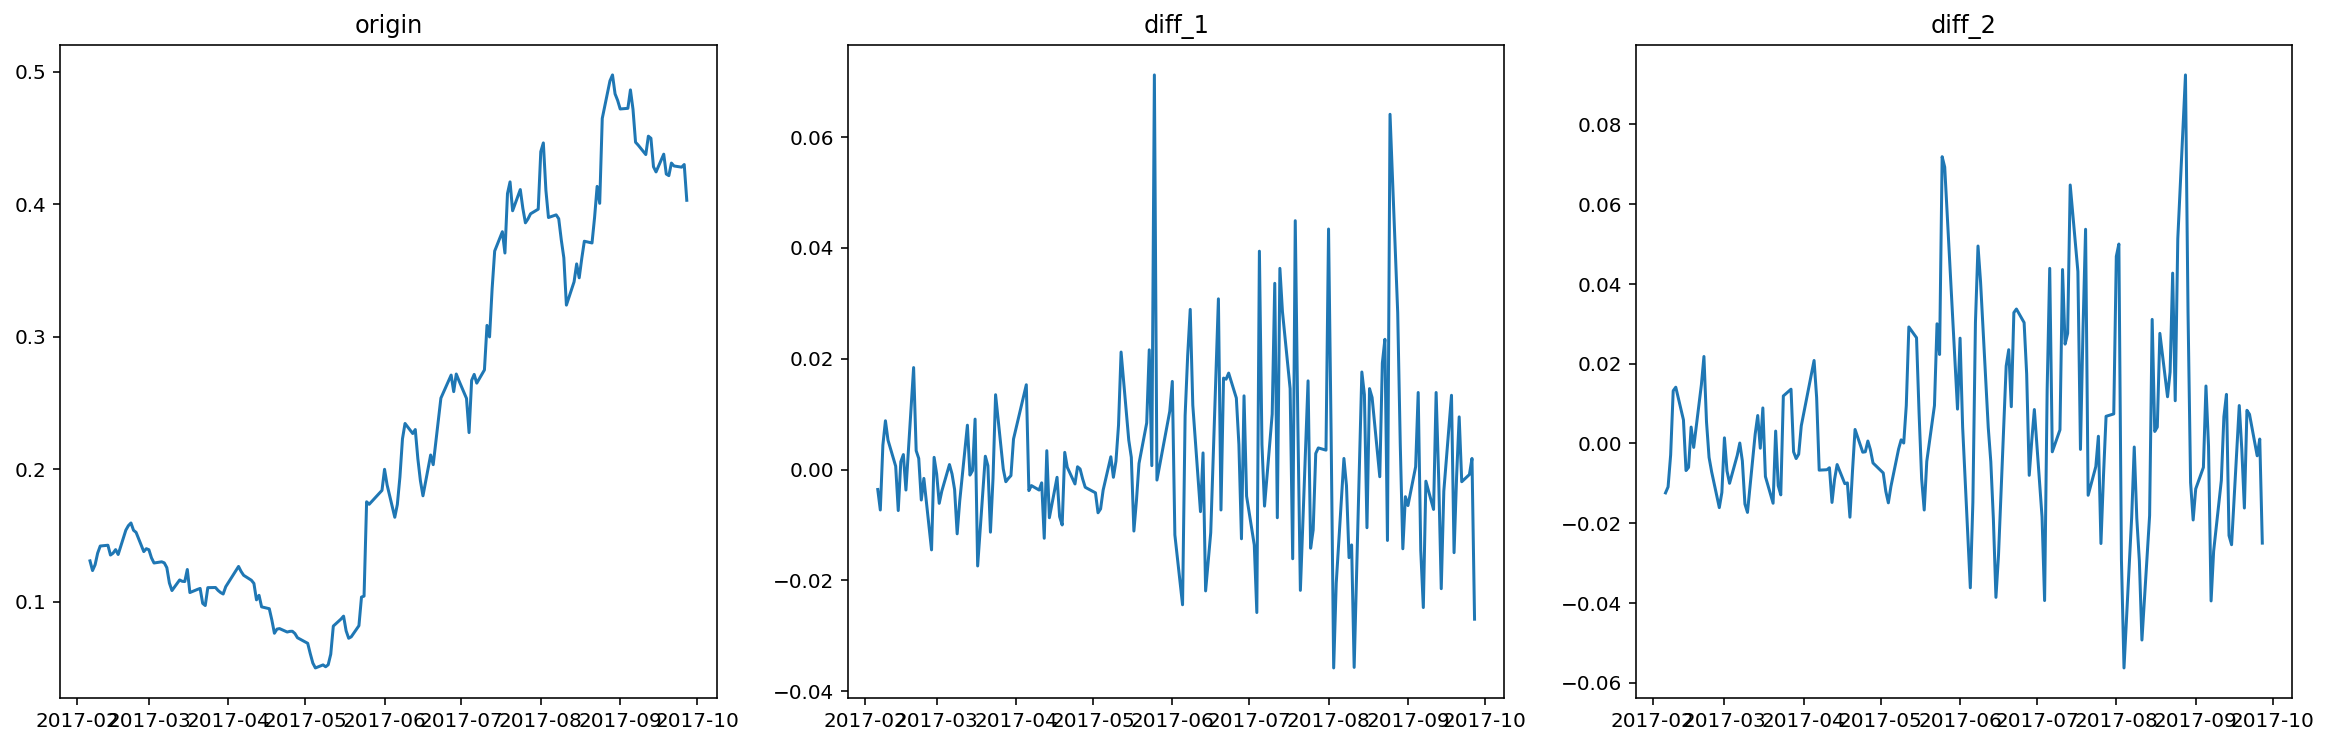

In [8]:
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(131)
ax1.set_title('origin')
ax1.plot(option_price['close'])

ax2 = fig.add_subplot(132)
ax2.set_title('diff_1')
ax2.plot(option_price['close_diff_1'])

ax3 = fig.add_subplot(133)
ax3.set_title('diff_2')
ax3.plot(option_price['close_diff_2'])
plt.show()

In [9]:
from statsmodels.tsa.stattools import adfuller   #Dickey-Fuller test
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')  #autolag : {‘AIC’, ‘BIC’, ‘t-stat’, None}
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

/Users/joyjigsaw/anaconda3/envs/python3/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/Users/joyjigsaw/anaconda3/envs/python3/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


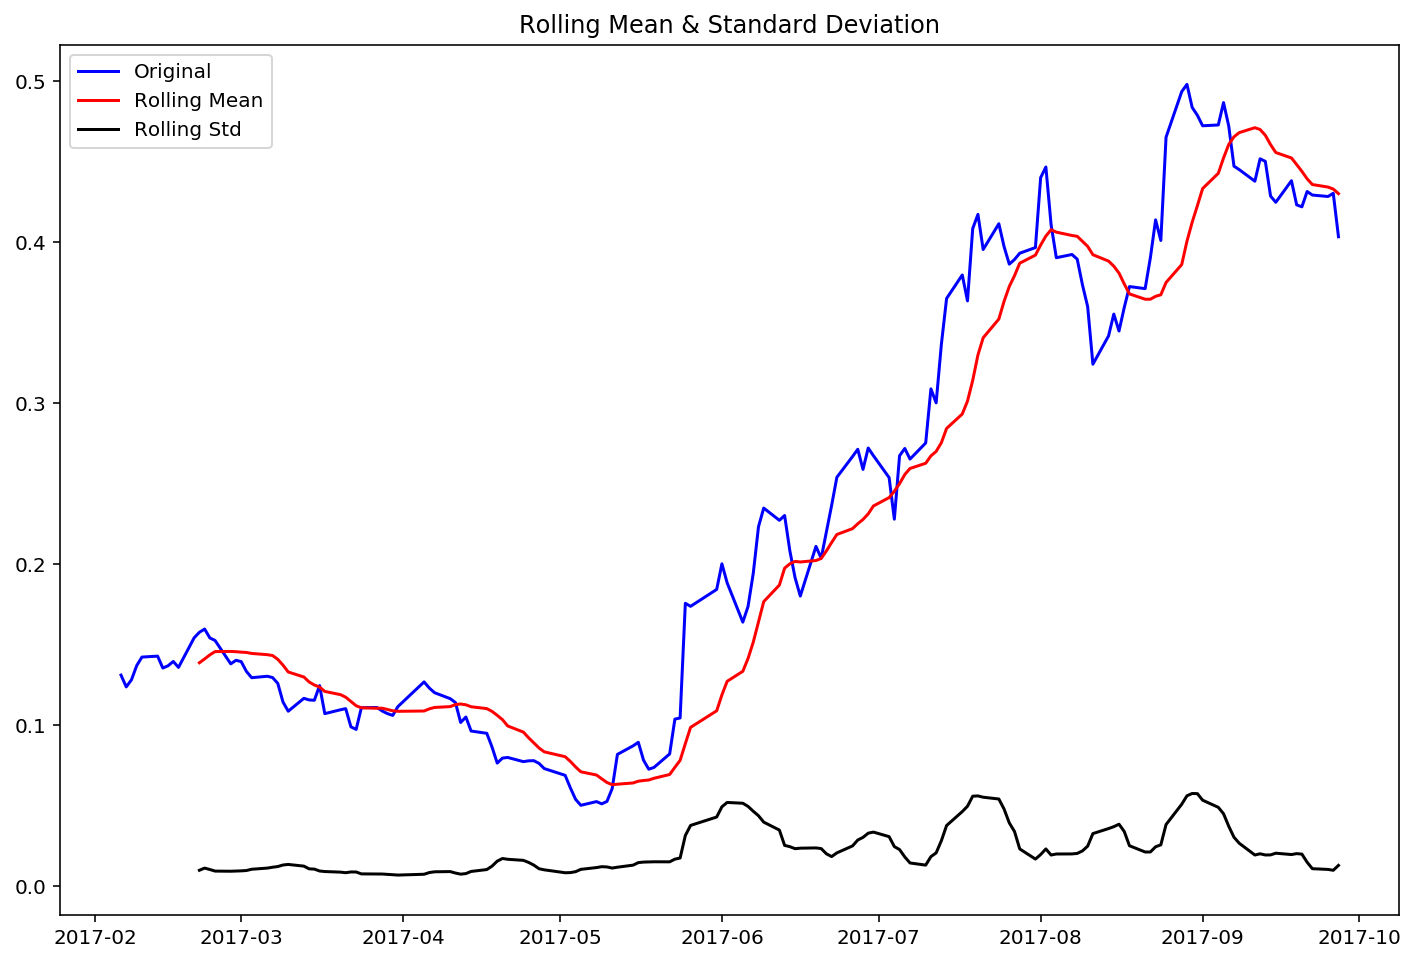

Results of Dickey-Fuller Test:
Test Statistic                  -0.668489
p-value                          0.854744
#Lags Used                       6.000000
Number of Observations Used    156.000000
Critical Value (5%)             -2.880252
Critical Value (1%)             -3.472979
Critical Value (10%)            -2.576747
dtype: float64


In [10]:
test_stationarity(option_price['close'].dropna(inplace=False))

/Users/joyjigsaw/anaconda3/envs/python3/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/Users/joyjigsaw/anaconda3/envs/python3/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


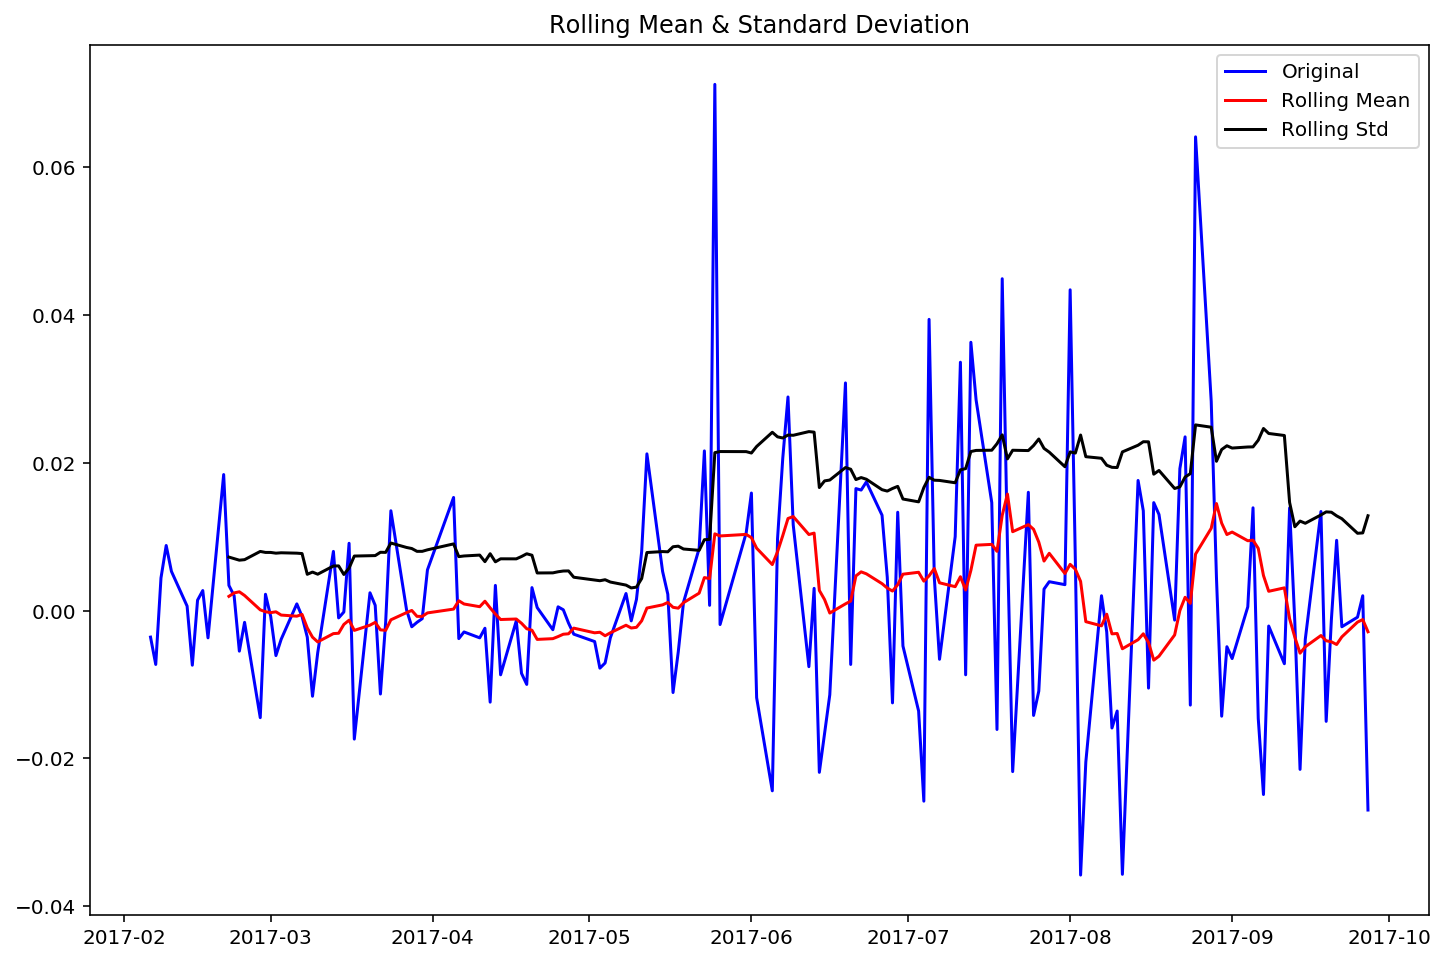

Results of Dickey-Fuller Test:
Test Statistic                  -4.453796
p-value                          0.000238
#Lags Used                       5.000000
Number of Observations Used    157.000000
Critical Value (5%)             -2.880132
Critical Value (1%)             -3.472703
Critical Value (10%)            -2.576683
dtype: float64


In [11]:
test_stationarity(option_price['close_diff_1'].dropna(inplace=False))

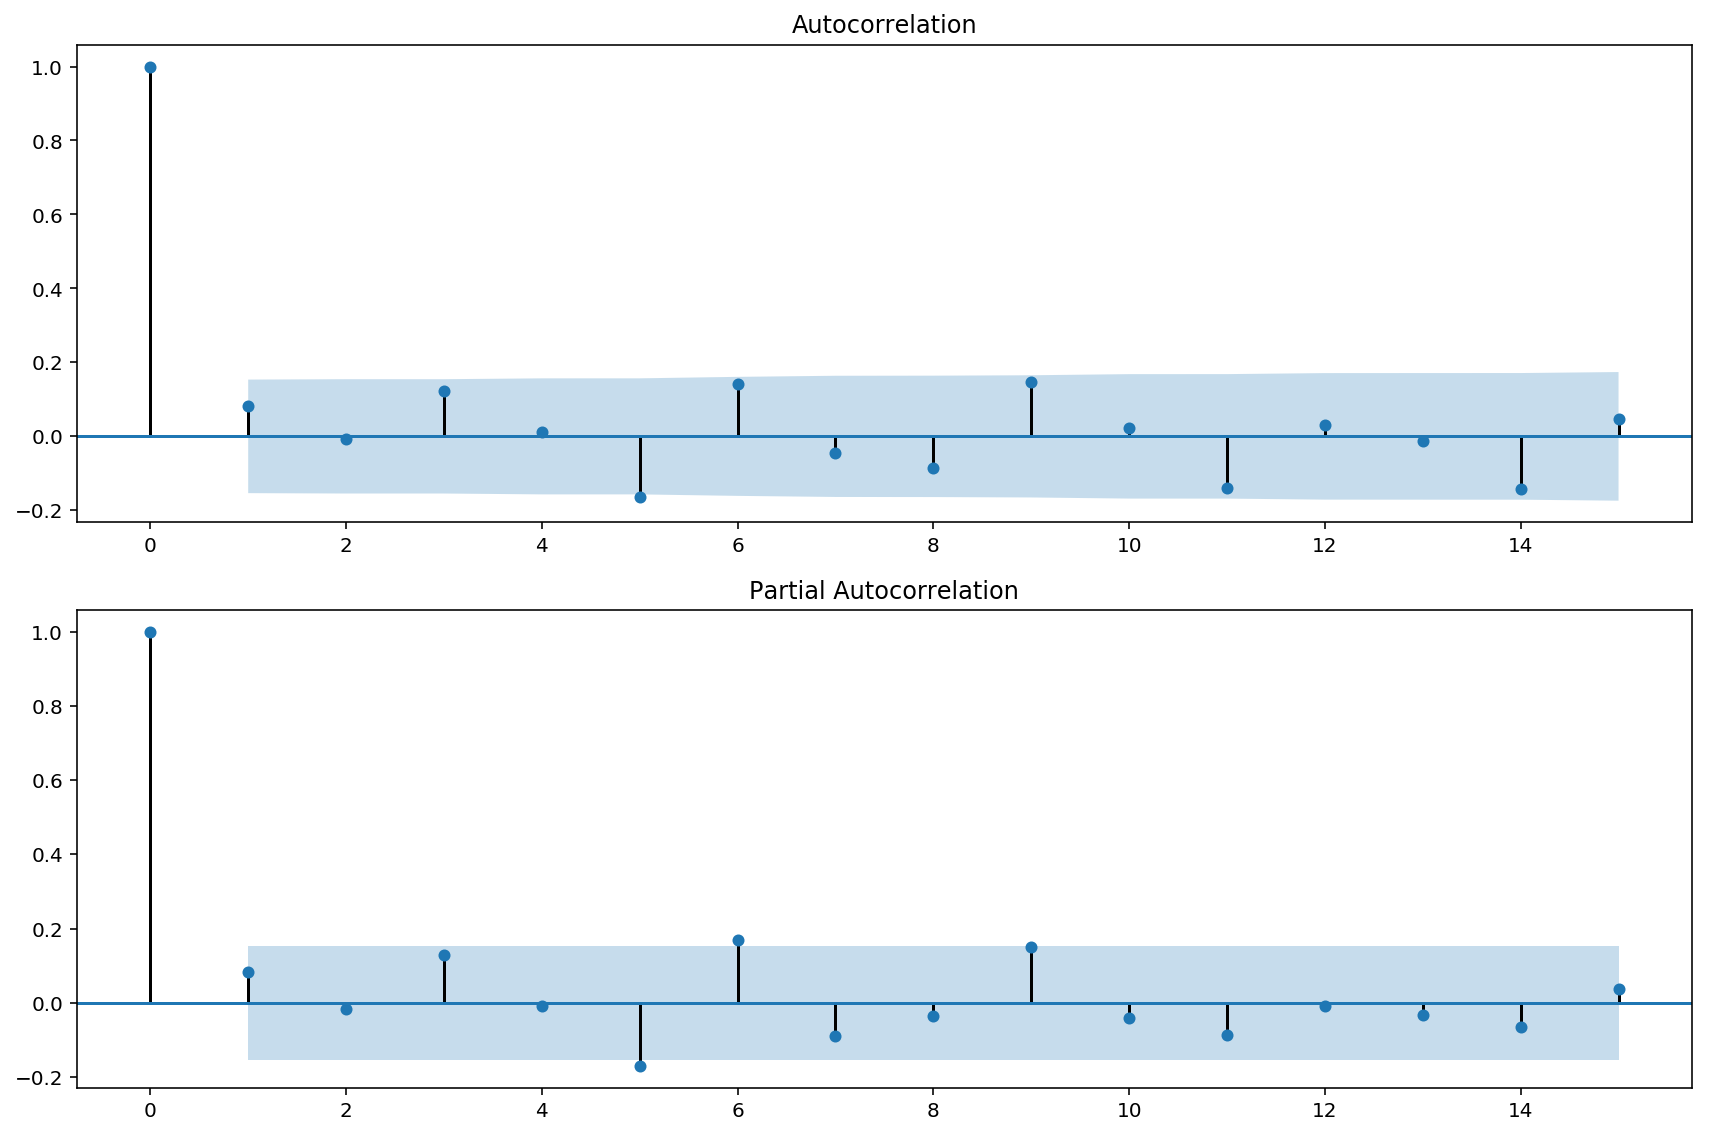

In [12]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(option_price['close_diff_1'], lags=15,ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout()

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(option_price['close_diff_1'], lags=15, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout()
plt.show()


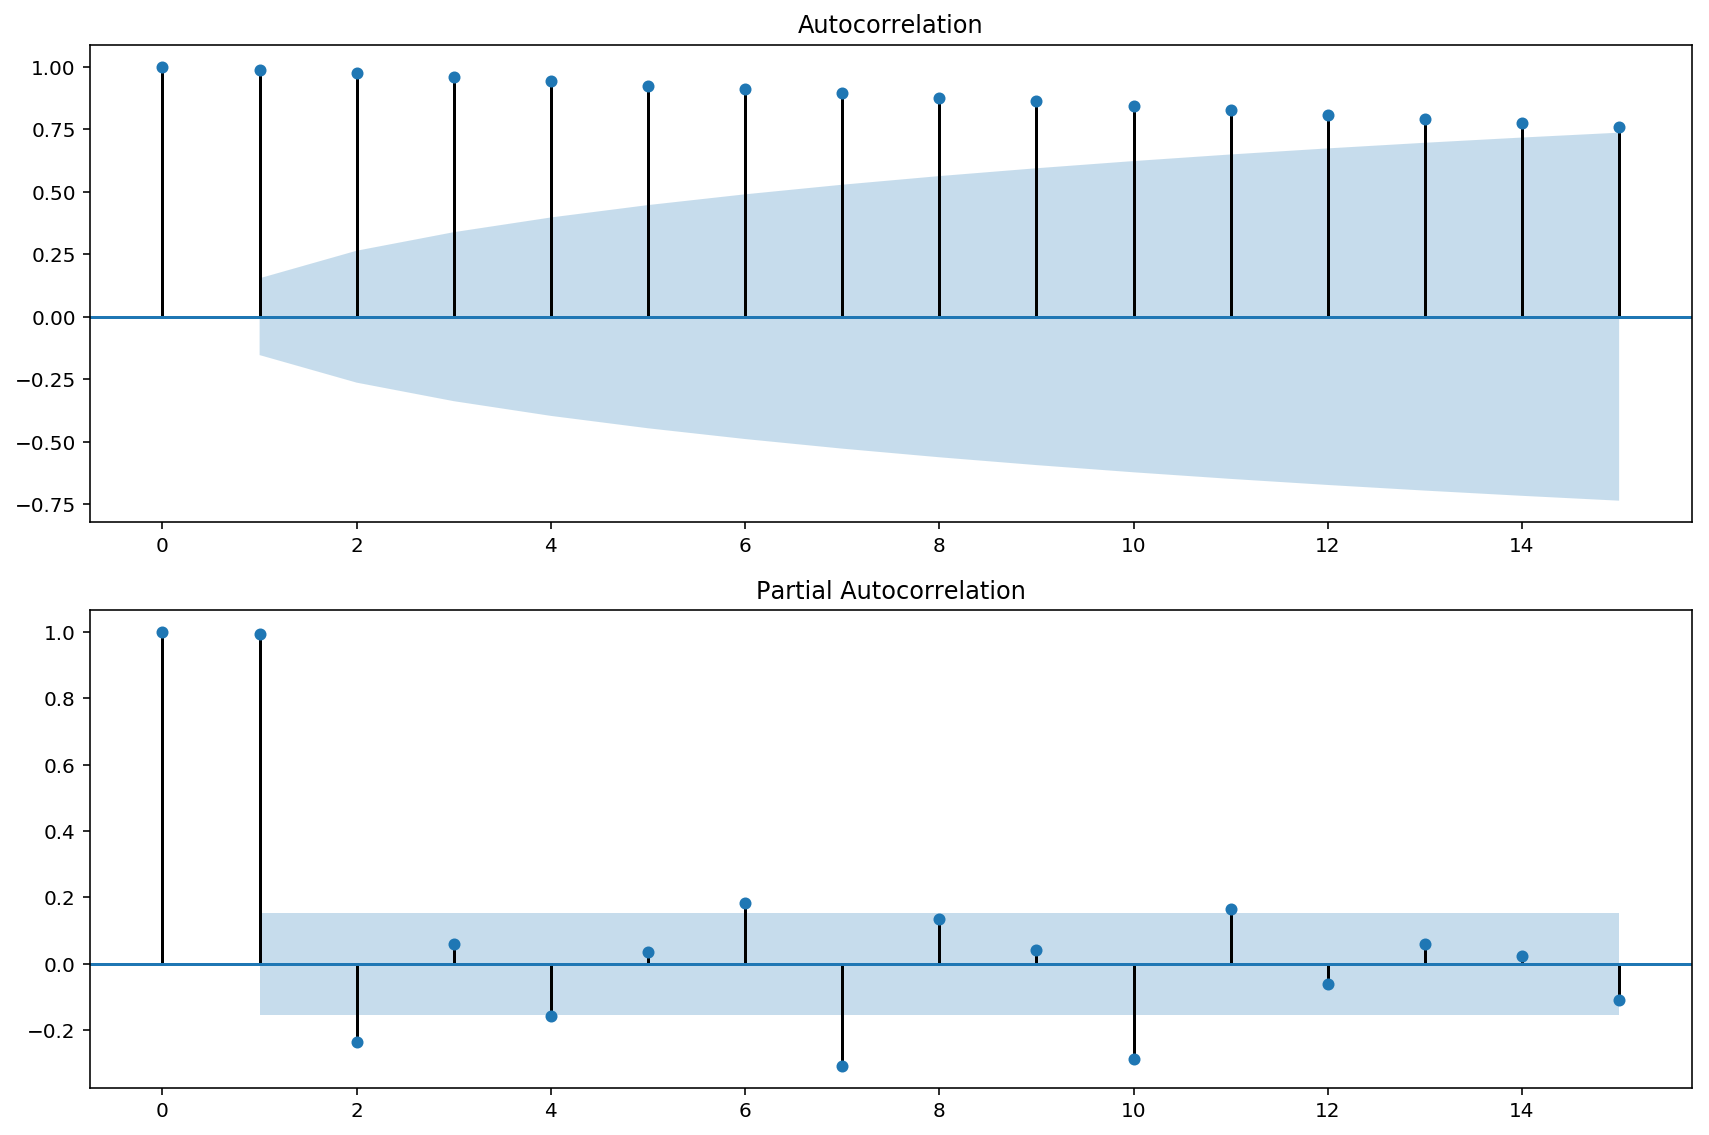

In [13]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(option_price['close'], lags=15,ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout()

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(option_price['close'], lags=15, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout()
plt.show()


In [14]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
train_results = sm.tsa.arma_order_select_ic(option_price['close_diff_1'].loc[:'2019-01'], ic=['aic', 'bic'], trend='nc', max_ar=5, max_ma=5)
print('AIC', train_results.aic_min_order)
print('BIC', train_results.bic_min_order)


('AIC', (2, 4))
('BIC', (0, 1))


In [16]:
#遍历，寻找适宜的参数
import itertools
import numpy as np
import seaborn as sns
 
p_min = 0
d_min = 0
q_min = 0
p_max = 5
d_max = 0
q_max = 5
 
# Initialize a DataFrame to store the results,，以BIC准则
results_bic = pd.DataFrame(index=['AR{}'.format(i) for i in range(p_min,p_max+1)],
                           columns=['MA{}'.format(i) for i in range(q_min,q_max+1)])
 
for p,d,q in itertools.product(range(p_min,p_max+1),
                               range(d_min,d_max+1),
                               range(q_min,q_max+1)):
    if p==0 and d==0 and q==0:
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = np.nan
        continue
 
    try:
        model = sm.tsa.ARIMA(option_price['close_diff_1'], order=(p, d, q),
                               #enforce_stationarity=False,
                               #enforce_invertibility=False,
                              )
        results = model.fit()
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = results.bic
    except:
        continue
results_bic = results_bic[results_bic.columns].astype(float)

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(results_bic,
                 mask=results_bic.isnull(),
                 ax=ax,
                 annot=True,
                 fmt='.2f',
                 )
ax.set_title('BIC')
plt.show()

KeyboardInterrupt: 

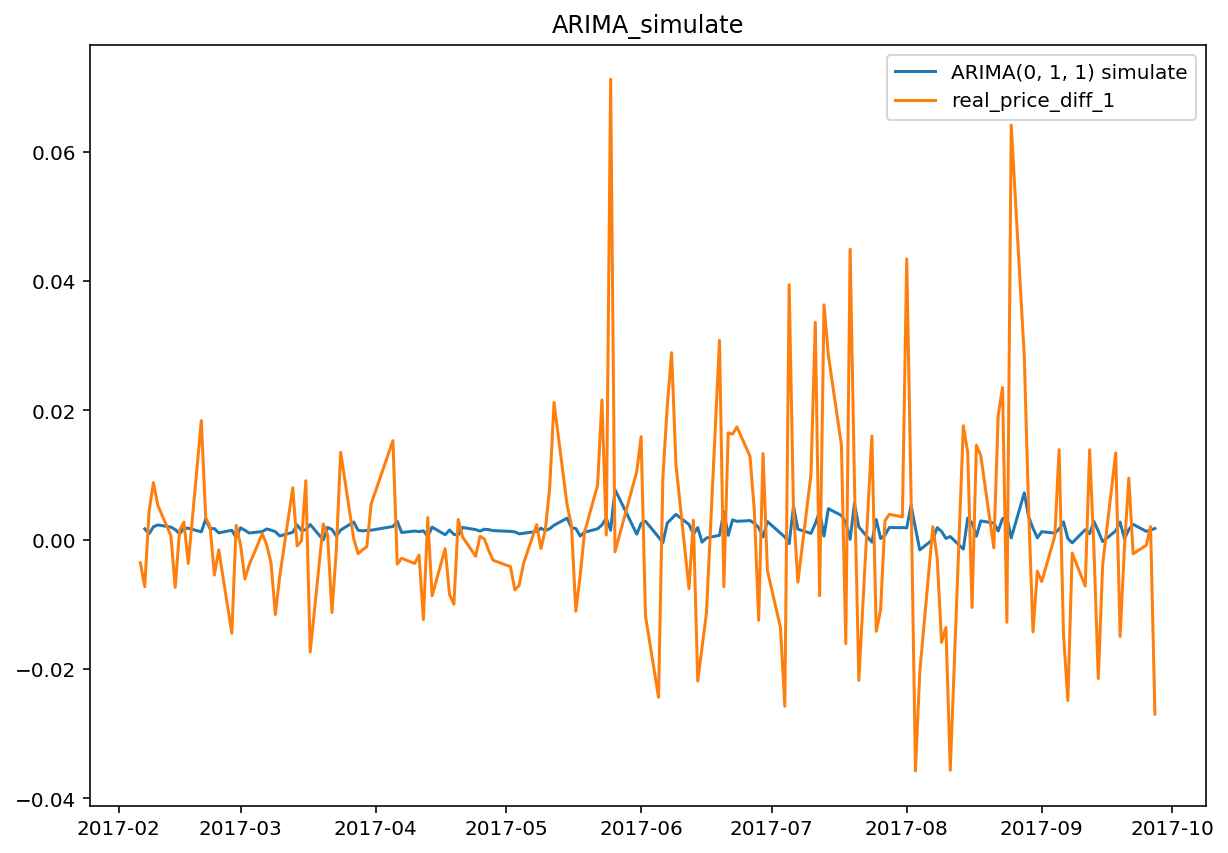

In [17]:
model = sm.tsa.ARIMA(option_price['close'], order=(0, 1, 1))
results = model.fit()
# predict_sunspots = results.predict(start=2,end=160,dynamic=False)
predict_sunspots = results.fittedvalues
plt.figure(figsize=(10, 7))
plt.plot(predict_sunspots, label='ARIMA(0, 1, 1) simulate')
plt.plot(option_price['close_diff_1'], label='real_price_diff_1')
plt.title("ARIMA_simulate")
plt.legend(loc='best')
plt.show()

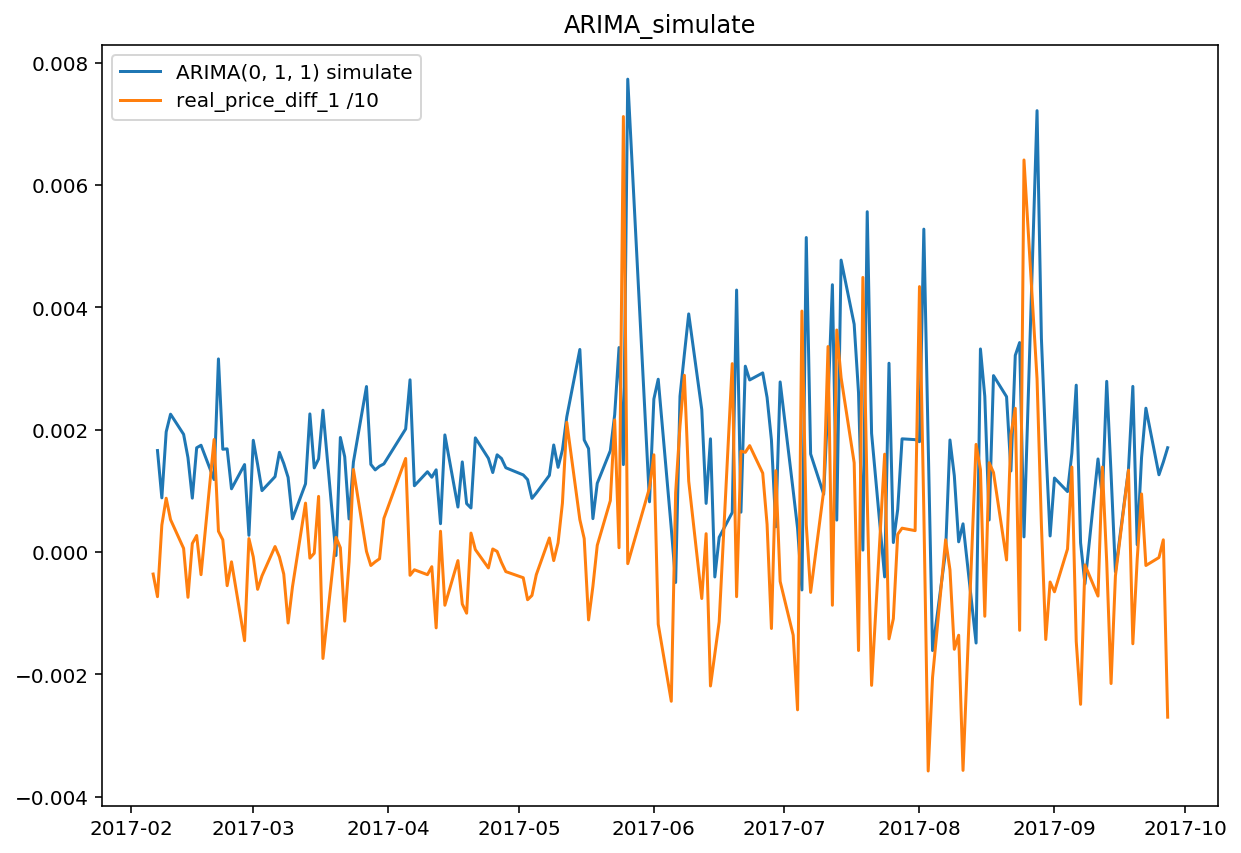

In [18]:
model = sm.tsa.ARIMA(option_price['close'], order=(0, 1, 1))
results = model.fit()
# predict_sunspots = results.predict(start=2,end=160,dynamic=False)
predict_sunspots = results.fittedvalues
plt.figure(figsize=(10, 7))
plt.plot(predict_sunspots, label='ARIMA(0, 1, 1) simulate')
plt.plot(option_price['close_diff_1']/10, label='real_price_diff_1 /10')
plt.title("ARIMA_simulate")
plt.legend(loc='best')
plt.show()

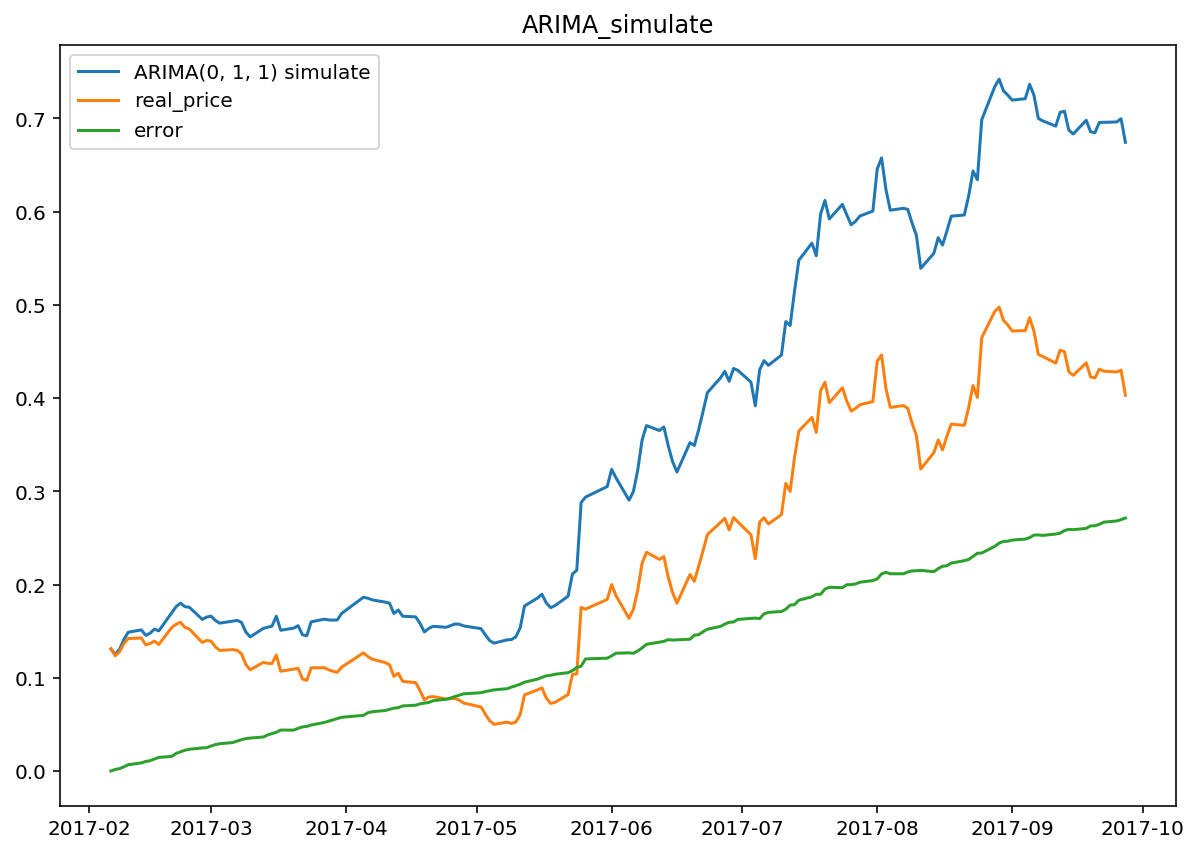

In [19]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA = pd.Series(option_price['close'], index=option_price.index)
predictions_ARIMA = predictions_ARIMA.add(predictions_ARIMA_diff_cumsum,fill_value=0)
plt.figure(figsize=(10, 7))
plt.plot(predictions_ARIMA, label='ARIMA(0, 1, 1) simulate')
plt.plot(option_price['close'],label='real_price')
plt.plot(predictions_ARIMA - option_price['close'],label='error')

plt.title("ARIMA_simulate")
plt.legend(loc='best')


In [ ]:
import numpy as np
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [146]:

mean_absolute_percentage_error(predictions_ARIMA,option_price['close'] )

35.36684268731922

In [151]:
print(results.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                  162
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 444.074
Method:                       css-mle   S.D. of innovations              0.016
Date:                Sat, 01 Jun 2019   AIC                           -882.148
Time:                        14:01:21   BIC                           -872.886
Sample:                             1   HQIC                          -878.388
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0017      0.001      1.245      0.215      -0.001       0.004
ma.L1.D.close     0.0870      0.082      1.058      0.292      -0.074       0.248
                                    Root

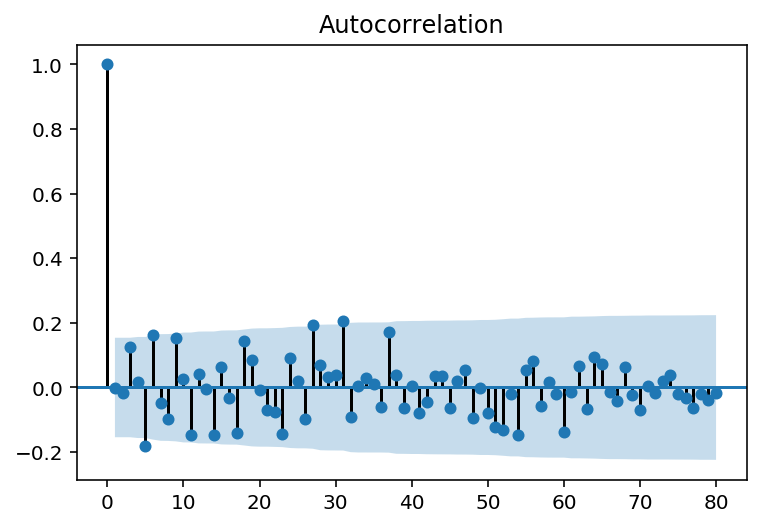

In [114]:
results = model.fit()
resid = results.resid #赋值

fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=80, )
#fig = plt.figure(figsize=(20,8))
plt.show()


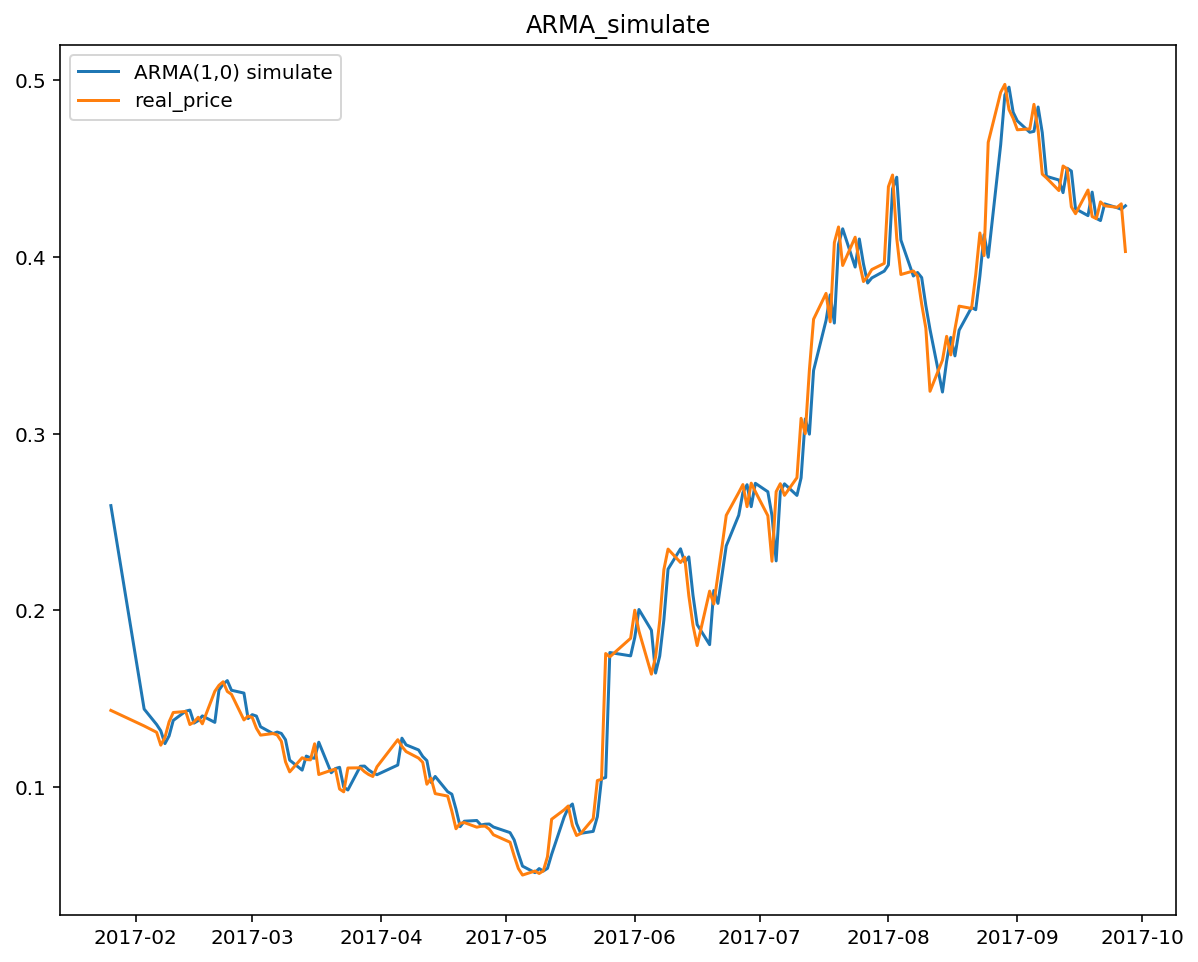

In [53]:
model = sm.tsa.ARIMA(sub, order=(1, 0, 0))
results = model.fit()
# predict_sunspots = results.predict(start=0,end=164,dynamic=False)
predict_sunspots = results.fittedvalues
plt.figure(figsize=(10, 8))
plt.plot(predict_sunspots, label='ARMA(1,0) simulate')
plt.plot(sub, label='real_price')
plt.title("ARMA_simulate")
plt.legend(loc='best')
plt.show()

In [155]:
results = model.fit()
resid = results.resid #赋值
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax = fig)

plt.show()


AttributeError: 'Figure' object has no attribute 'vlines'

<Figure size 864x576 with 0 Axes>

In [153]:
results = model.fit()
resid = results.resid #赋值

with mpl.rc_context():
    mpl.rc("figure", figsize=(12,8))
    sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40)


NameError: name 'mpl' is not defined

In [25]:
model = sm.tsa.ARIMA(sub, order=(2, 0, 4))
results = model.fit()
predict_sunspots = results.predict(start=0,end=164,dynamic=False)
print(predict_sunspots)

trade_date
2017-01-26    0.252668
2017-02-03    0.144045
2017-02-06    0.134214
2017-02-07    0.131216
2017-02-08    0.122751
2017-02-09    0.128467
2017-02-10    0.138933
2017-02-13    0.143428
2017-02-14    0.146419
2017-02-15    0.135620
2017-02-16    0.138242
2017-02-17    0.139414
2017-02-20    0.135208
2017-02-21    0.159273
2017-02-22    0.157851
2017-02-23    0.162681
2017-02-24    0.156670
2017-02-27    0.150842
2017-02-28    0.137801
2017-03-01    0.138793
2017-03-02    0.140103
2017-03-03    0.131431
2017-03-06    0.132204
2017-03-07    0.129482
2017-03-08    0.130210
2017-03-09    0.126331
2017-03-10    0.113661
2017-03-13    0.108838
2017-03-14    0.117093
2017-03-15    0.115126
                ...   
2017-08-17    0.340451
2017-08-18    0.368692
2017-08-21    0.368825
2017-08-22    0.371834
2017-08-23    0.394339
2017-08-24    0.413869
2017-08-25    0.400389
2017-08-28    0.476015
2017-08-29    0.494265
2017-08-30    0.499747
2017-08-31    0.491472
2017-09-01    0.469190


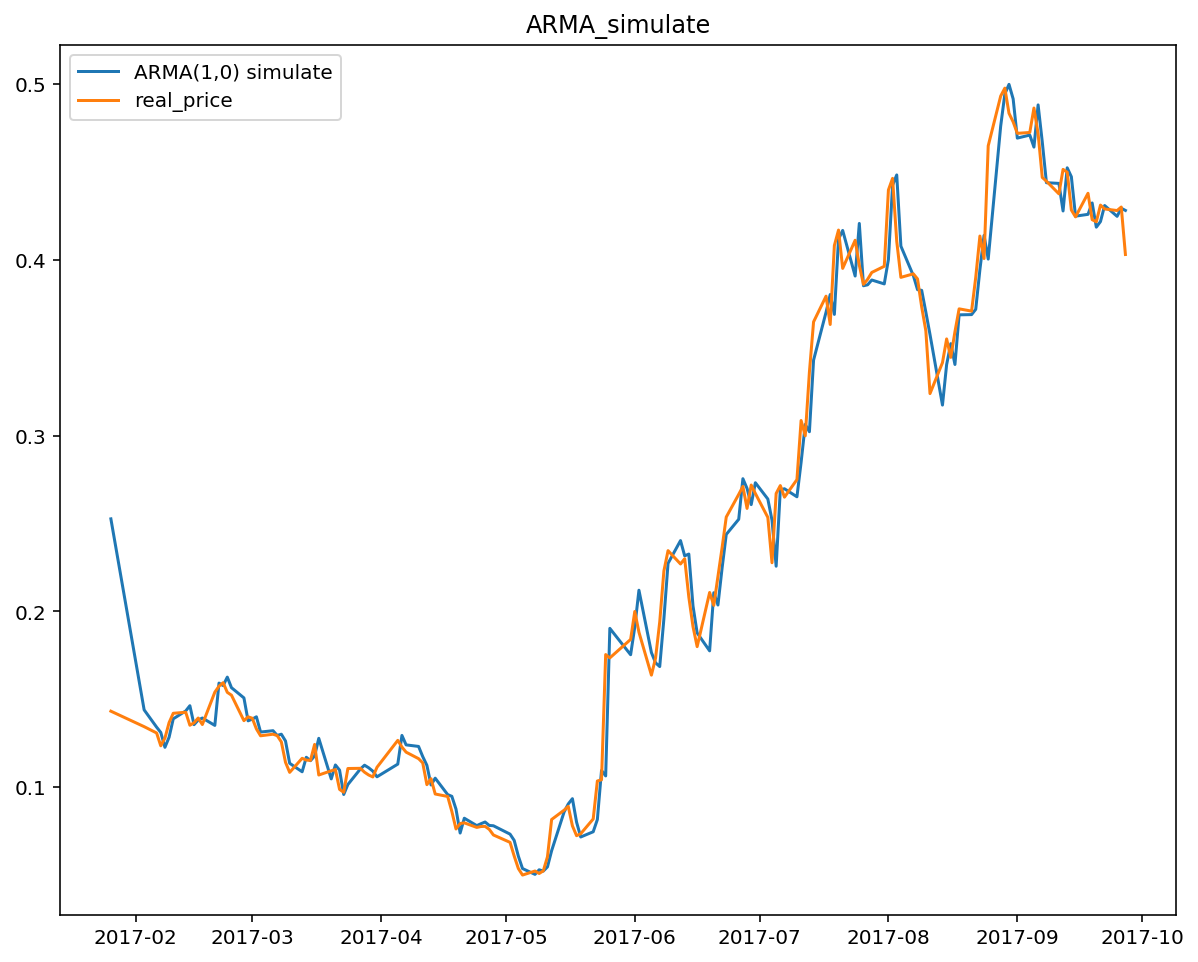

In [26]:
plt.figure(figsize=(10, 8))
plt.plot(predict_sunspots, label='ARMA(1,0) simulate')
plt.plot(sub, label='real_price')
plt.title("ARMA_simulate")
plt.legend(loc='best')
plt.show()

<Figure size 864x576 with 0 Axes>

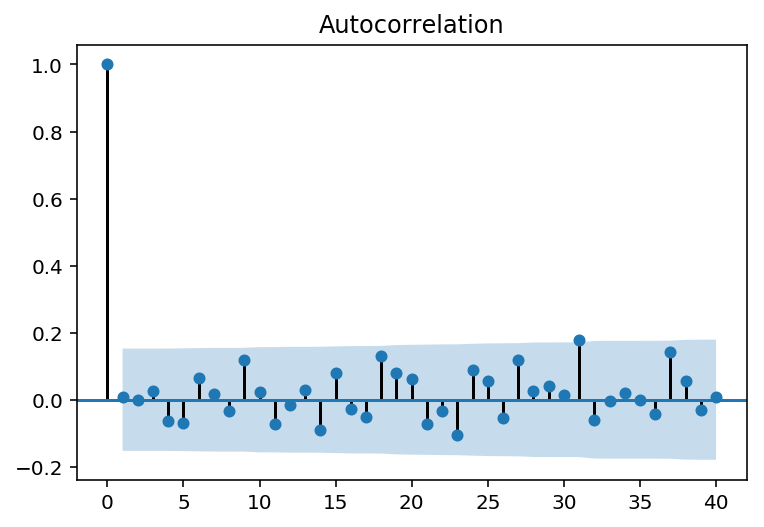

In [27]:
results = model.fit()
resid = results.resid #赋值
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40)
plt.show()


In [145]:
import numpy as np
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [26]:
mean_absolute_percentage_error(predict_sunspots, sub)

5.810092278460862

In [ ]:
mean_absolute_percentage_error

In [ ]:
summary = pd.DataFrame(index = apredict_sunspots.index)